In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("world_population.csv")
df.head()


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


## Inspect & Clean the Data

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

## Convert Population Columns to Numeric

In [4]:
pop_cols = [col for col in df.columns if "Population" in col and col[:4].isdigit()]
df[pop_cols] = df[pop_cols].apply(pd.to_numeric, errors='coerce')


## Population Growth Analysis

In [8]:
df['% Growth (1970–2022)'] = (
    (df['2022 Population'] - df['1970 Population']) / df['1970 Population']
) * 100


In [9]:
df['CAGR (1970–2022)'] = (
    (df['2022 Population'] / df['1970 Population']) ** (1/52) - 1
) * 100


In [10]:
print(df.columns.tolist())


['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage', '% Growth (1970–2022)', 'CAGR (1970–2022)']


In [11]:
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Convert to numeric
df['1970 Population'] = pd.to_numeric(df['1970 Population'], errors='coerce')
df['2022 Population'] = pd.to_numeric(df['2022 Population'], errors='coerce')

# Drop or fix invalid rows
df = df[df['1970 Population'] > 0]

# Calculate metrics
df['% Growth (1970–2022)'] = ((df['2022 Population'] - df['1970 Population']) / df['1970 Population']) * 100
df['CAGR (1970–2022)'] = ((df['2022 Population'] / df['1970 Population']) ** (1/52) - 1) * 100

# Show results
df[['Country/Territory', '1970 Population', '2022 Population', '% Growth (1970–2022)', 'CAGR (1970–2022)']].head(10)


,Country/Territory,1970 Population,2022 Population,% Growth (1970–2022),CAGR (1970–2022)
0,Afghanistan,10752971,41128771,282.487510,2.613424
1,Albania,2324731,2842321,22.264511,0.387319
2,Algeria,13795915,44903225,225.482036,2.295443
3,American Samoa,27075,44273,63.519852,0.950186
4,Andorra,19860,79824,301.933535,2.711330
5,Angola,6029700,35588987,490.228154,3.473063
6,Anguilla,6283,15857,152.379437,1.796256
7,Antigua and Barbuda,64516,93763,45.332941,0.721547
8,Argentina,23842803,45510318,90.876542,1.250946
9,Armenia,2534377,2780469,9.710158,0.178374


## Visual Exploration

C:\Users\satye\AppData\Local\Temp\ipykernel_4844\3756333748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='2022 Population', y='Country/Territory', palette='viridis')


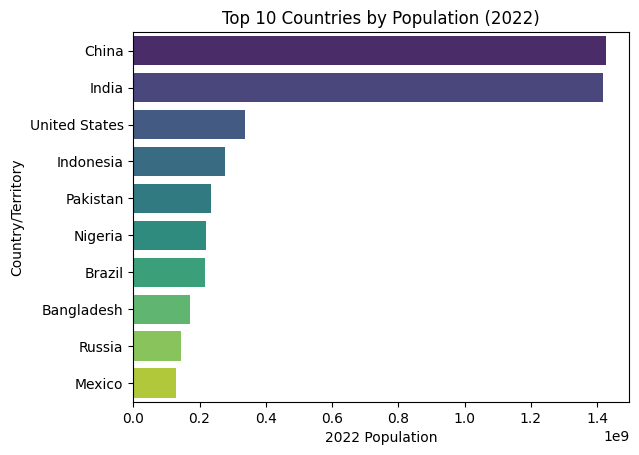

In [12]:
top10 = df.sort_values('2022 Population', ascending=False).head(10)
sns.barplot(data=top10, x='2022 Population', y='Country/Territory', palette='viridis')
plt.title("Top 10 Countries by Population (2022)")
plt.show()


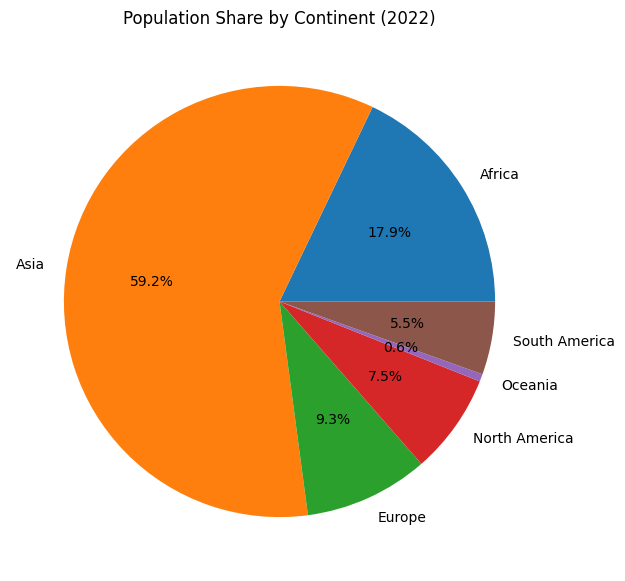

In [13]:
continent_share = df.groupby('Continent')['2022 Population'].sum()
continent_share.plot.pie(autopct='%1.1f%%', figsize=(7,7))
plt.title("Population Share by Continent (2022)")
plt.ylabel('')
plt.show()


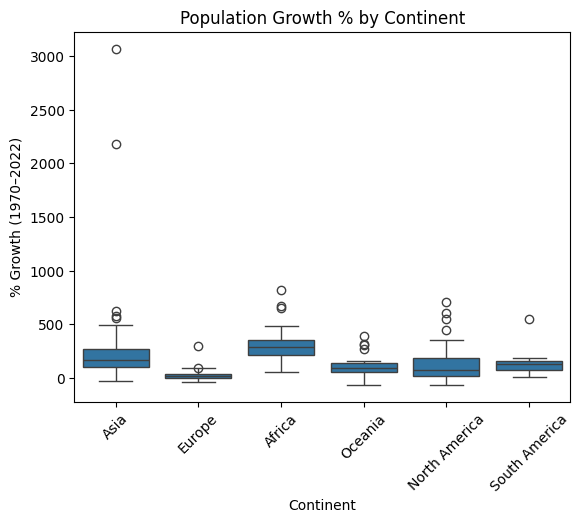

In [14]:
sns.boxplot(data=df, x='Continent', y='% Growth (1970–2022)')
plt.title("Population Growth % by Continent")
plt.xticks(rotation=45)
plt.show()


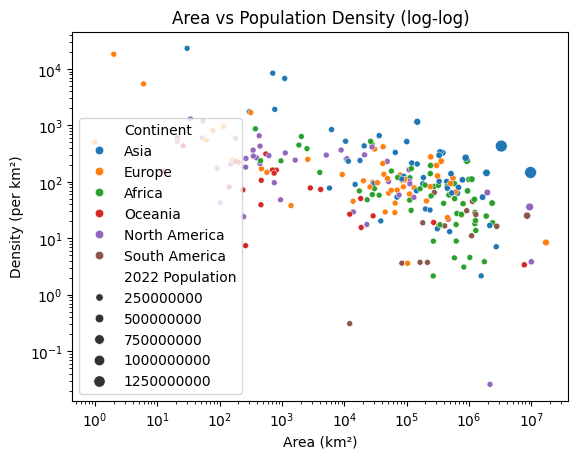

In [15]:
sns.scatterplot(data=df, x='Area (km²)', y='Density (per km²)', hue='Continent', size='2022 Population')
plt.xscale('log')
plt.yscale('log')
plt.title("Area vs Population Density (log-log)")
plt.show()


##  Advanced Analysis 

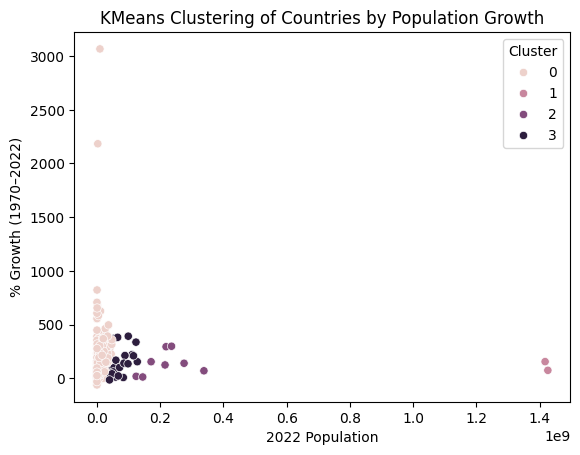

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[pop_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

df_clustered = df.loc[X.index].copy()
df_clustered['Cluster'] = clusters

sns.scatterplot(data=df_clustered, x='2022 Population', y='% Growth (1970–2022)', hue='Cluster')
plt.title("KMeans Clustering of Countries by Population Growth")
plt.show()


## Top 10 Countries by % Growth

C:\Users\satye\AppData\Local\Temp\ipykernel_4844\537979657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth, x='% Growth (1970–2022)', y='Country/Territory', palette='magma')


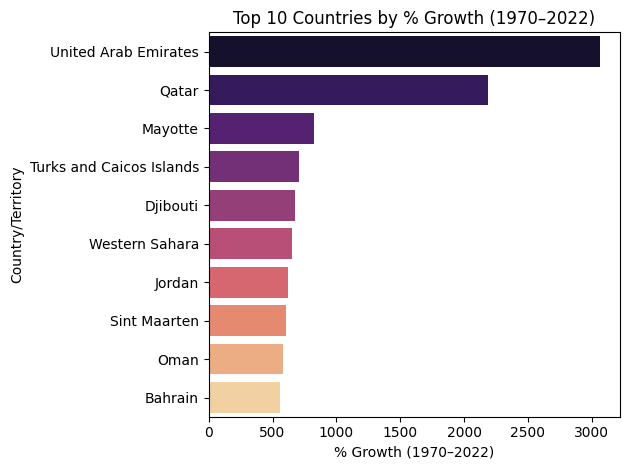

In [17]:
top_growth = df.sort_values('% Growth (1970–2022)', ascending=False).head(10)
sns.barplot(data=top_growth, x='% Growth (1970–2022)', y='Country/Territory', palette='magma')
plt.title("Top 10 Countries by % Growth (1970–2022)")
plt.tight_layout()
plt.show()


##  Correlation Heatmap

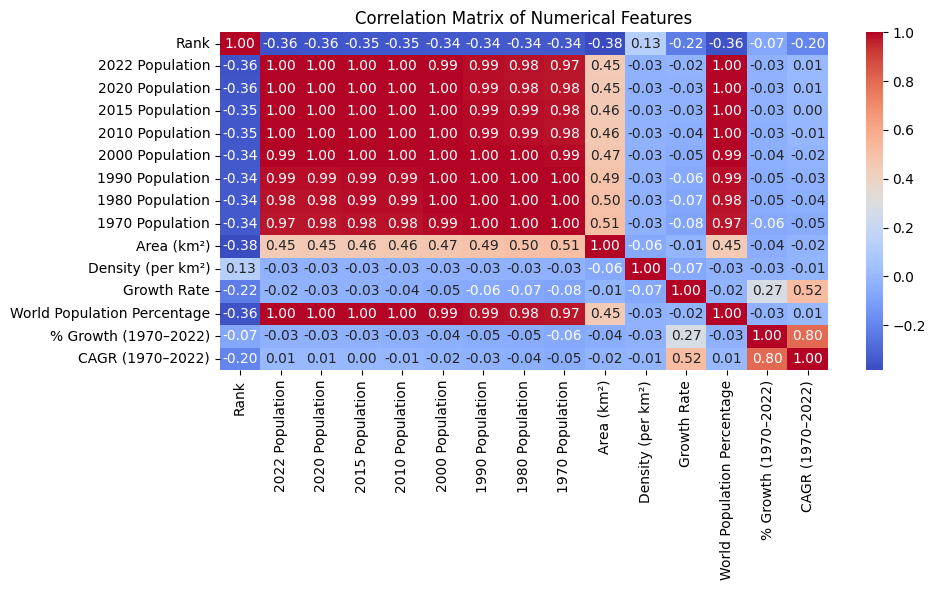

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


## PCA Before Clustering

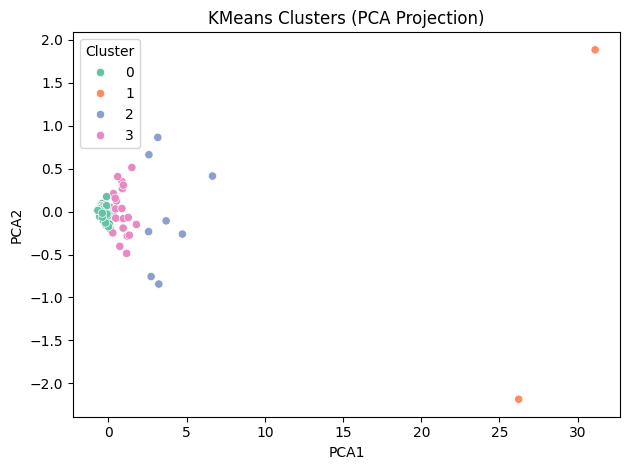

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clustered['PCA1'] = X_pca[:, 0]
df_clustered['PCA2'] = X_pca[:, 1]

sns.scatterplot(data=df_clustered, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("KMeans Clusters (PCA Projection)")
plt.tight_layout()
plt.show()


## Time Series Trend for Selected Countries

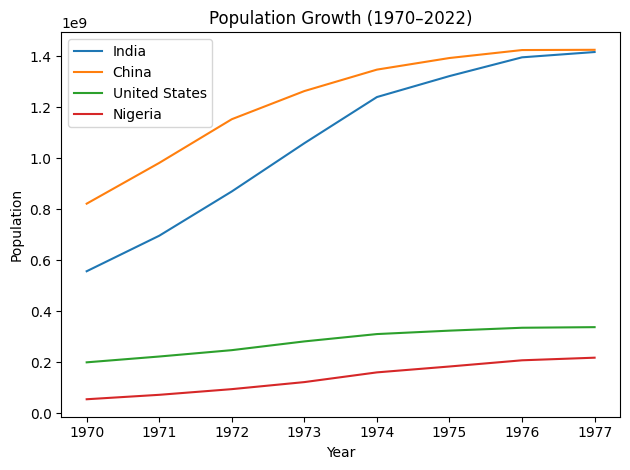

In [21]:
# Adjust the years to match your column names
years = [f"{y} Population" for y in range(1970, 2023)]

# Check first to make sure all these columns exist in df
available_years = [col for col in years if col in df.columns]

# Plot for selected countries
selected_countries = ['India', 'China', 'United States', 'Nigeria']
df_selected = df[df['Country/Territory'].isin(selected_countries)]

for country in selected_countries:
    row = df_selected[df_selected['Country/Territory'] == country]
    if not row.empty:
        plt.plot(range(1970, 1970 + len(available_years)), row[available_years].values.flatten(), label=country)

plt.title("Population Growth (1970–2022)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.tight_layout()
plt.show()
